# Box targets analisys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import normalize
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

e:\programs\py\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df_train_X = pd.read_csv('../Data/train_data.csv')
df_train_Y = pd.read_csv('../Data/train_answers.csv')

In [3]:
df_test = pd.read_csv('../Data/test_data.csv')

In [5]:
df_train = df_train_X.merge(df_train_Y, on='itemId', how='inner')

## EDA

In [6]:
df_train.head()

,userId,itemId,Xmin,Ymin,Xmax,Ymax,Xmin_true,Ymin_true,Xmax_true,Ymax_true
0,1164,6132,62,656,276,803,47,650,213,812
1,1399,6132,184,662,235,740,47,650,213,812
2,1694,6132,63,648,272,830,47,650,213,812
3,916,6132,111,637,253,831,47,650,213,812
4,1621,6132,60,651,242,819,47,650,213,812


In [8]:
df_train['X_Y_ratio'] = (df_train['Xmax_true'] - df_train['Xmin_true'])/\
                            (df_train['Ymax_true'] - df_train['Ymin_true'])
    
df_train['X_Y_ratio'] = df_train['X_Y_ratio'].replace(np.inf, 2)
df_train.fillna(1, inplace=True)

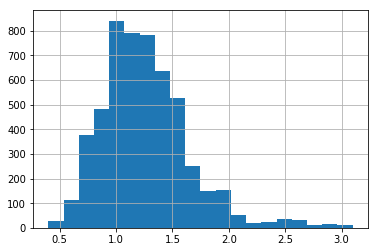

In [10]:
df_train['X_Y_ratio'].hist(bins=20)

In [11]:
df_train['X_Y_ratio'].mean()

1.2615958680650863